In [15]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os

# Import custom functions (make sure these are available in the notebook's directory)
from clean_data import clean_data  # Import the clean_data function from clean_data.py
from aggregate_data import aggregate_user_data, segment_users_into_deciles  # Import aggregation and segmentation functions
from extract_data import connect_to_db


In [16]:
# Cell 2: Fetch data from the database
df = connect_to_db()

# Display the first few rows to check the data
df.head()


,user_id,handset_manufacturer,handset_type,xdr_sessions,total_session_duration,total_download_data,total_upload_data,social_media_volume,google_volume,email_volume,youtube_volume,netflix_volume,gaming_volume,other_volume,total_volume
0,3.360100e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,1,116720.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
1,3.360100e+10,Apple,Apple iPhone 7 (A1778),1,181230.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,undefined,undefined,1,134969.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,Apple,Apple iPhone 5S (A1457),1,49878.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,Apple,Apple iPhone Se (A1723),2,37104.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09


In [17]:
# Cell 3: Clean the data using the clean_data function
df = clean_data(df)

# Display cleaned data
df.head()


Columns in the DataFrame: Index(['user_id', 'handset_manufacturer', 'handset_type', 'xdr_sessions',
       'total_session_duration', 'total_download_data', 'total_upload_data',
       'social_media_volume', 'google_volume', 'email_volume',
       'youtube_volume', 'netflix_volume', 'gaming_volume', 'other_volume',
       'total_volume'],
      dtype='object')


,user_id,handset_manufacturer,handset_type,xdr_sessions,total_session_duration,total_download_data,total_upload_data,social_media_volume,google_volume,email_volume,youtube_volume,netflix_volume,gaming_volume,other_volume,total_volume,application,total_data_volume
0,3.360100e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,1,116720.0,842637466.0,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,812458661.0,386570872.0,878690574.0,social_media,878690574.0
1,3.360100e+10,Apple,Apple iPhone 7 (A1778),1,181230.0,120755184.0,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,119750078.0,281710071.0,156859643.0,social_media,156859643.0
2,3.360100e+10,undefined,undefined,1,134969.0,556659663.0,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,538827713.0,501693672.0,595966483.0,social_media,595966483.0
3,3.360101e+10,Apple,Apple iPhone 5S (A1457),1,49878.0,401993172.0,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,391126127.0,35279702.0,422320698.0,social_media,422320698.0
5,3.360101e+10,Samsung,Samsung Galaxy A8 (2018),2,253983.0,555207972.0,60009249.0,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,511635787.0,492372777.0,615217221.0,social_media,615217221.0


In [18]:
# Cell 4: Basic statistics of the cleaned data
print("Basic Statistics:")
print(df.describe())


Basic Statistics:
            user_id  xdr_sessions  total_session_duration  \
count  8.974300e+04  89743.000000            89743.000000   
mean   3.742856e+10      1.146240           107345.746977   
std    1.124828e+12      0.355831            65482.071688   
min    3.360100e+10      1.000000             7142.000000   
25%    3.365074e+10      1.000000            59169.000000   
50%    3.366358e+10      1.000000            89794.000000   
75%    3.368313e+10      1.000000           149824.500000   
max    3.370000e+14      3.000000           325211.000000   

       total_download_data  total_upload_data  social_media_volume  \
count         8.974300e+04       8.974300e+04         8.974300e+04   
mean          5.164790e+08       4.601904e+07         2.098153e+06   
std           2.951646e+08       1.637208e+07         1.288446e+06   
min           8.827082e+06       2.866892e+06         1.563000e+03   
25%           2.761385e+08       3.470888e+07         1.061091e+06   
50%         

In [19]:
# Cell 5: Non-Graphical Univariate Analysis - Dispersion Parameters
quantitative_columns = ['total_session_duration', 'total_data_volume', 'total_download_data', 'total_upload_data']

# Displaying statistics for each quantitative column
for column in quantitative_columns:
    print(f"\n{column}:")
    mean = df[column].mean()
    median = df[column].median()
    variance = df[column].var()
    std_dev = df[column].std()
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    # Display the statistics
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Interpretation of the metrics
    print("Interpretation:")
    if skewness > 0:
        print(f"The distribution of {column} is positively skewed.")
    elif skewness < 0:
        print(f"The distribution of {column} is negatively skewed.")
    else:
        print(f"The distribution of {column} is symmetric.")

    if kurtosis > 0:
        print(f"The distribution of {column} is leptokurtic (heavier tails).")
    elif kurtosis < 0:
        print(f"The distribution of {column} is platykurtic (lighter tails).")
    else:
        print(f"The distribution of {column} is mesokurtic (normal).")



total_session_duration:
Mean: 107345.75
Median: 89794.00
Variance: 4287901712.61
Standard Deviation: 65482.07
Interquartile Range (IQR): 90655.50
Skewness: 0.76
Kurtosis: 0.28
Interpretation:
The distribution of total_session_duration is positively skewed.
The distribution of total_session_duration is leptokurtic (heavier tails).

total_data_volume:
Mean: 562498072.83
Median: 551330506.00
Variance: 90883353889624272.00
Standard Deviation: 301468661.54
Interquartile Range (IQR): 454203300.00
Skewness: 0.52
Kurtosis: 0.06
Interpretation:
The distribution of total_data_volume is positively skewed.
The distribution of total_data_volume is leptokurtic (heavier tails).

total_download_data:
Mean: 516479031.85
Median: 507152849.00
Variance: 87122122111465616.00
Standard Deviation: 295164567.85
Interquartile Range (IQR): 451562070.00
Skewness: 0.46
Kurtosis: -0.05
Interpretation:
The distribution of total_download_data is positively skewed.
The distribution of total_download_data is platykurt

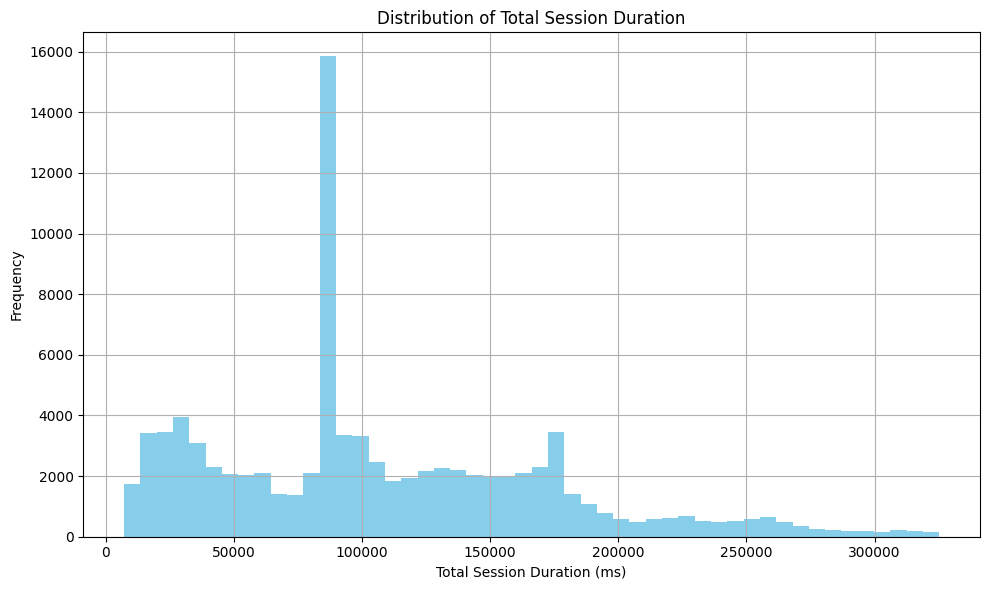

In [20]:
# Cell 6: Graphical Univariate Analysis - Plot Distribution of Total Session Duration
plt.figure(figsize=(10, 6))
plt.hist(df['total_session_duration'], bins=50, color='skyblue')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Session Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


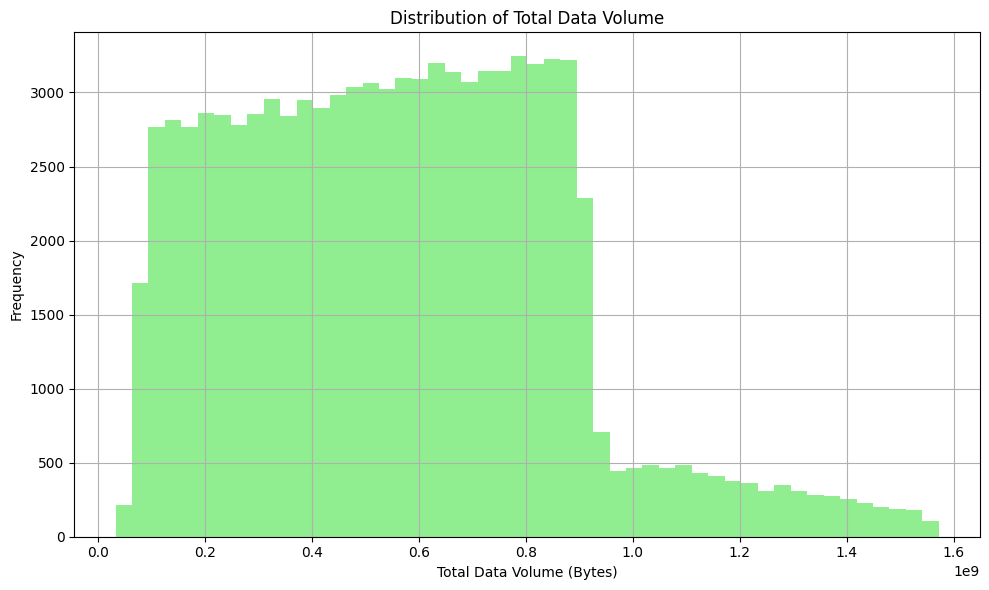

In [21]:
# Cell 7: Graphical Univariate Analysis - Plot Distribution of Total Data Volume
plt.figure(figsize=(10, 6))
plt.hist(df['total_data_volume'], bins=50, color='lightgreen')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Data Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


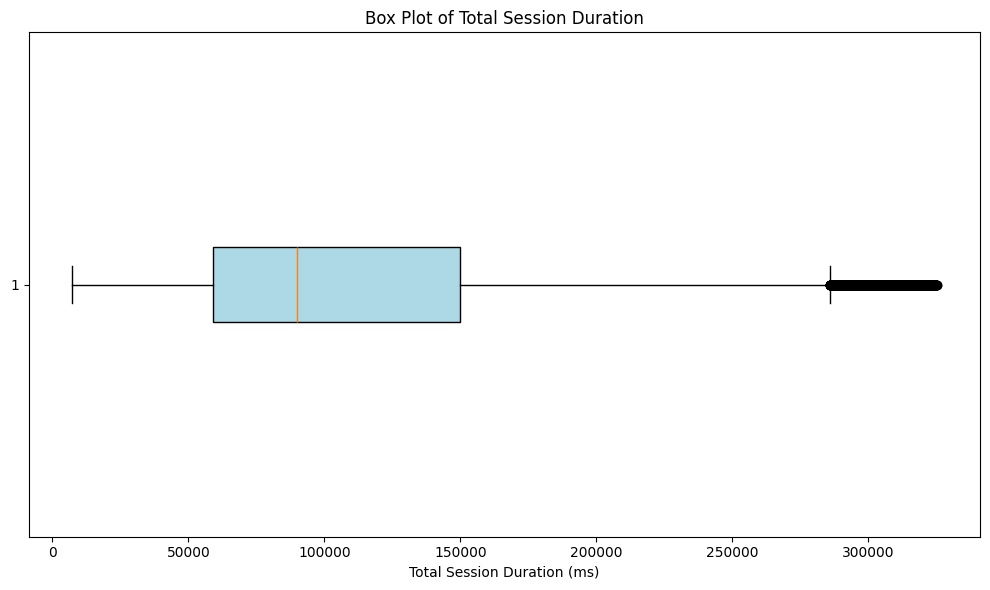

In [22]:
# Cell 8: Box Plot for Total Session Duration
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_session_duration'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Total Session Duration (ms)')
plt.title('Box Plot of Total Session Duration')
plt.tight_layout()
plt.show()


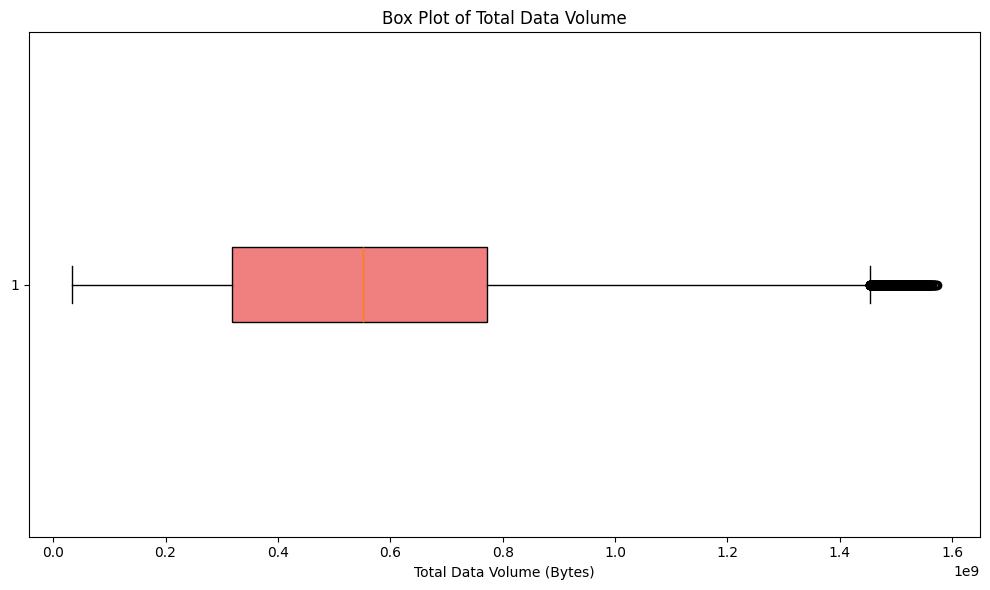

In [23]:
# Cell 9: Box Plot for Total Data Volume
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_data_volume'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Total Data Volume (Bytes)')
plt.title('Box Plot of Total Data Volume')
plt.tight_layout()
plt.show()


In [24]:
# Cell 10: Correlation Analysis - Total Session Duration vs Total Data Volume
correlation = df[['total_session_duration', 'total_data_volume']].corr()
print("Correlation between Total Session Duration and Total Data Volume:")
print(correlation)


Correlation between Total Session Duration and Total Data Volume:
                        total_session_duration  total_data_volume
total_session_duration                 1.00000            0.17536
total_data_volume                      0.17536            1.00000


Decile Summary:
   duration_decile  total_data_volume  avg_session_duration  \
0                5       4.874026e+12          98482.783016   
1                6       4.983106e+12         122801.493314   
2                7       4.836473e+12         149850.268108   
3                8       5.880892e+12         175190.601850   
4                9       6.295092e+12         242593.721337   

   total_session_duration  user_count  
0            8.836860e+08        8972  
1            1.102021e+09        8974  
2            1.344756e+09        8974  
3            1.572160e+09        8972  
4            2.177279e+09        8975  


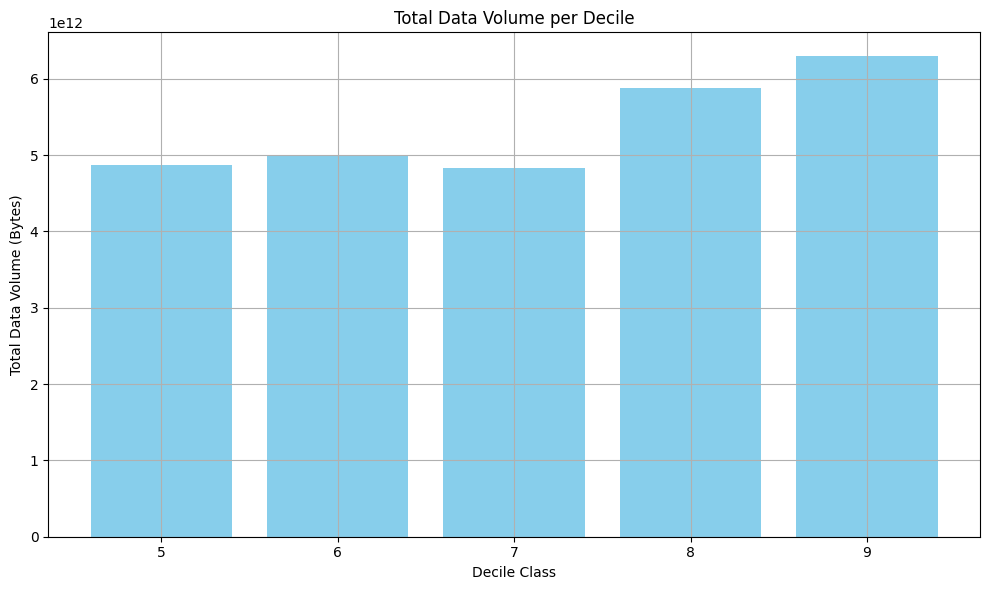

,duration_decile,total_data_volume,avg_session_duration,total_session_duration,user_count
0,5,4.874026e+12,98482.783016,8.836860e+08,8972
1,6,4.983106e+12,122801.493314,1.102021e+09,8974
2,7,4.836473e+12,149850.268108,1.344756e+09,8974
3,8,5.880892e+12,175190.601850,1.572160e+09,8972
4,9,6.295092e+12,242593.721337,2.177279e+09,8975


In [25]:
# Cell 11: Segment Users into Deciles Based on Total Session Duration
decile_summary = segment_users_into_deciles(df)

# Display the summary
decile_summary.head()


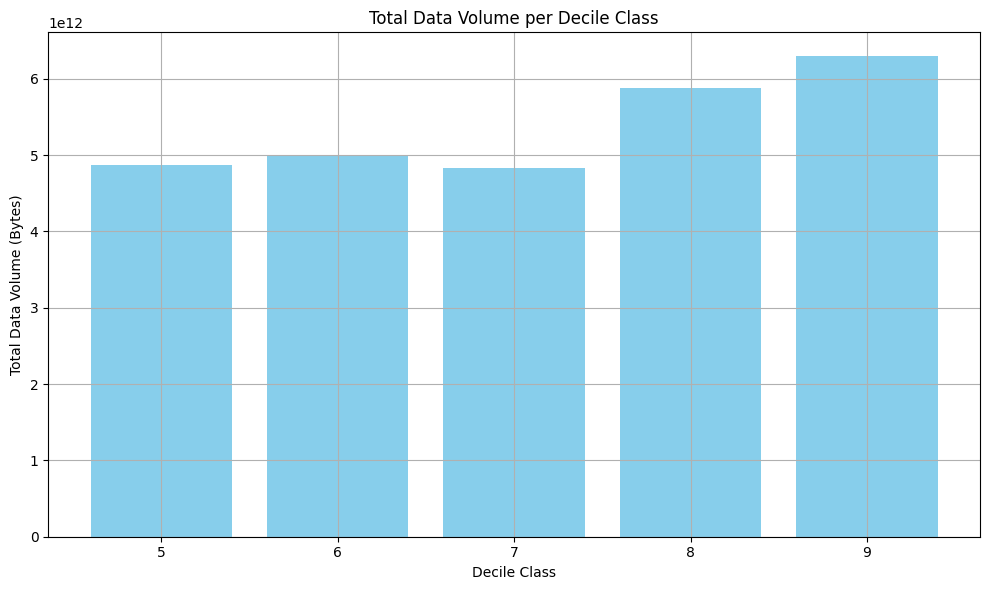

In [26]:
# Cell 12: Plot Total Data Volume per Decile
plt.figure(figsize=(10, 6))
plt.bar(decile_summary['duration_decile'], decile_summary['total_data_volume'], color='skyblue')
plt.xlabel('Decile Class')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Total Data Volume per Decile Class')
plt.grid(True)
plt.tight_layout()
plt.show()


Columns in the DataFrame: Index(['user_id', 'handset_manufacturer', 'handset_type', 'xdr_sessions',
       'total_session_duration', 'total_download_data', 'total_upload_data',
       'social_media_volume', 'google_volume', 'email_volume',
       'youtube_volume', 'netflix_volume', 'gaming_volume', 'other_volume',
       'total_volume', 'application', 'total_data_volume', 'duration_decile',
       'PCA1', 'PCA2'],
      dtype='object')
Columns in df_merged: Index(['user_id', 'handset_manufacturer', 'handset_type', 'application',
       'total_data_volume', 'total_session_duration', 'total_download_data',
       'total_upload_data'],
      dtype='object')
        user_id handset_manufacturer                    handset_type  \
0  3.360100e+10               Huawei  Huawei P20 Lite Huawei Nova 3E   
1  3.360100e+10                Apple          Apple iPhone 7 (A1778)   
2  3.360100e+10            undefined                       undefined   
3  3.360101e+10                Apple         Appl

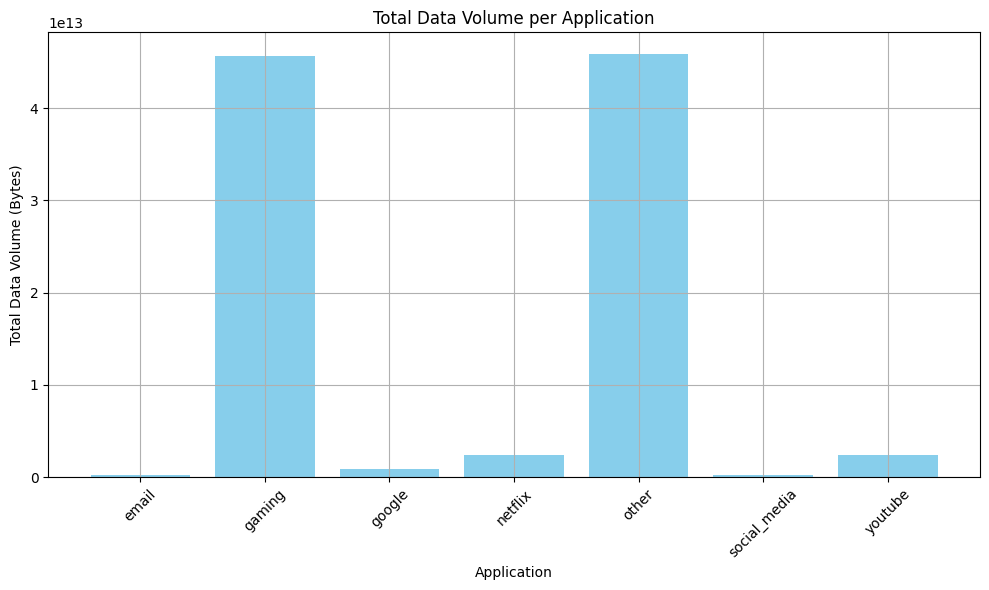

  application  total_data_volume
0       email       2.415173e+11
1      gaming       4.560486e+13
2      google       8.348258e+11
3     netflix       2.388670e+12
4       other       4.591764e+13


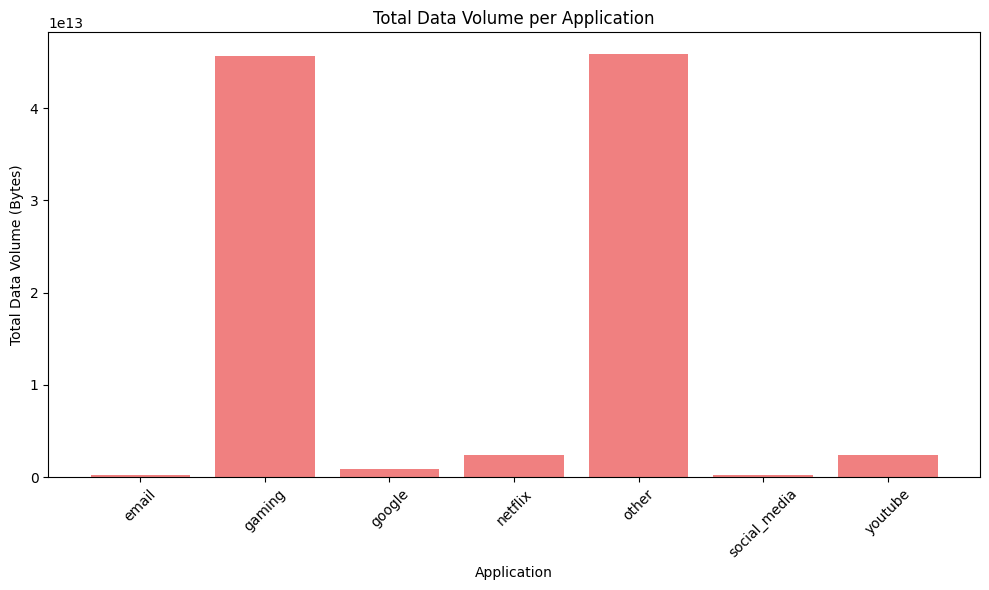

In [30]:
# Cell 14: Plot Total Data Volume per Application
aggregated_data, app_data_volume = aggregate_user_data(df)

# Display application data volume to confirm it exists
print(app_data_volume.head())
plt.figure(figsize=(10, 6))
plt.bar(app_data_volume['application'], app_data_volume['total_data_volume'], color='lightcoral')
plt.xlabel('Application')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Total Data Volume per Application')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


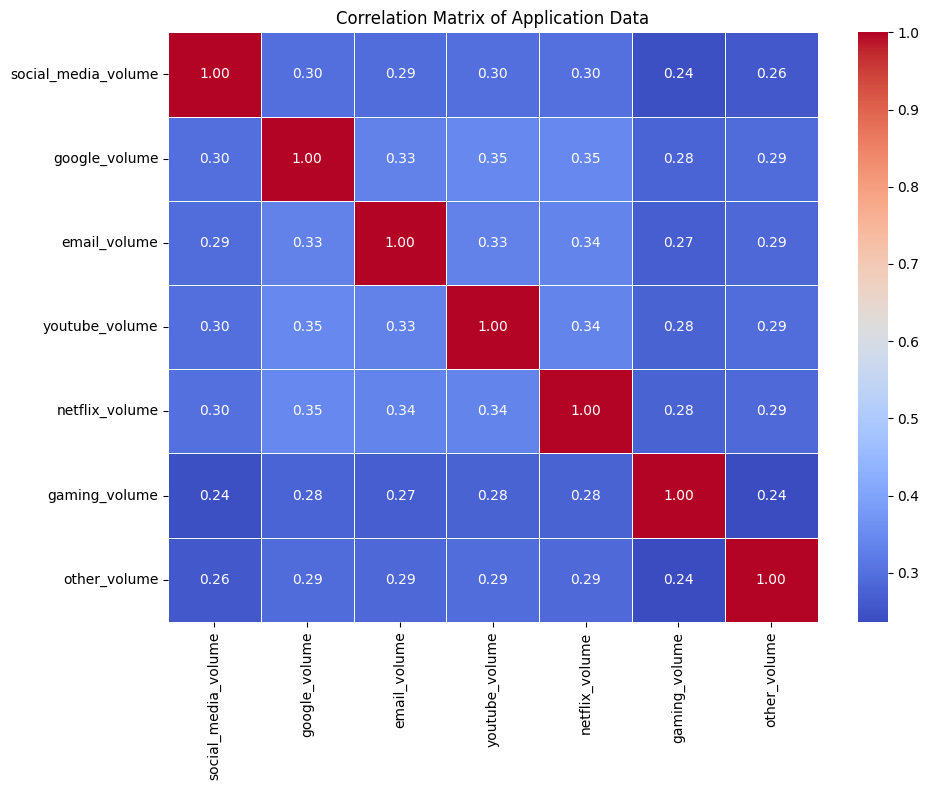

                     social_media_volume  google_volume  email_volume  \
social_media_volume             1.000000       0.299102      0.294367   
google_volume                   0.299102       1.000000      0.334451   
email_volume                    0.294367       0.334451      1.000000   
youtube_volume                  0.298186       0.346767      0.332986   
netflix_volume                  0.301391       0.345635      0.337842   
gaming_volume                   0.243470       0.279632      0.268610   
other_volume                    0.259269       0.292475      0.286184   

                     youtube_volume  netflix_volume  gaming_volume  \
social_media_volume        0.298186        0.301391       0.243470   
google_volume              0.346767        0.345635       0.279632   
email_volume               0.332986        0.337842       0.268610   
youtube_volume             1.000000        0.335866       0.276942   
netflix_volume             0.335866        1.000000       0.27661

In [28]:
# Cell 15: Correlation Matrix for Application Data
correlation_columns = ['social_media_volume', 'google_volume', 'email_volume', 
                       'youtube_volume', 'netflix_volume', 'gaming_volume', 'other_volume']

# Ensure columns exist before performing correlation analysis
missing_columns = [col for col in correlation_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
else:
    correlation_data = df[correlation_columns].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Application Data")
    plt.tight_layout()
    plt.show()
    print(correlation_data)


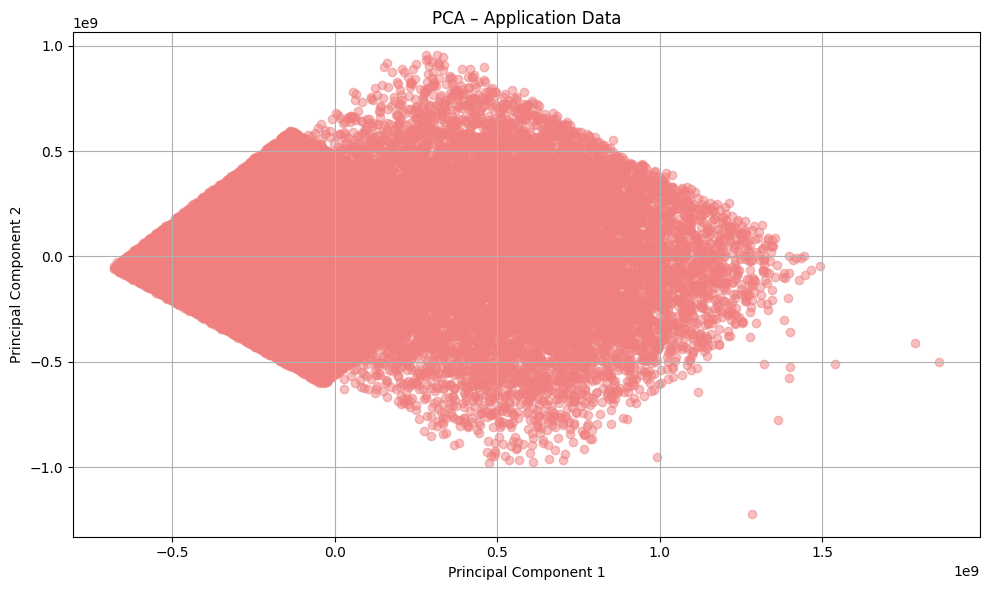

In [29]:
# Cell 16: Perform PCA (Dimensionality Reduction)
pca_data = df[['social_media_volume', 'google_volume', 'email_volume', 
               'youtube_volume', 'netflix_volume', 'gaming_volume', 'other_volume']].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_data)

# Add PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, color='lightcoral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA – Application Data')
plt.grid(True)
plt.tight_layout()
plt.show()
